In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from reader import read_data_raw

In [3]:
X, y = read_data_raw()

In [4]:
X.describe()

,theta,energy,r,r_plane,S,delta_t,dt_aop,dt_peaks,dtul_asymm,dtapcnt_u,dtapcnt_l
count,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000,176271.000000
mean,29.622139,8.700899,1.299368,-0.043466,7.259867,0.186721,249.567168,6.044590,0.286724,0.841568,0.752716
std,10.444713,4.110244,0.490271,0.599999,14.073827,0.223672,157.490137,4.372137,0.164184,1.079914,0.999013
min,0.907355,1.254560,0.500004,-3.506910,0.466668,-0.535662,43.873900,0.000000,0.000000,0.000000,0.000000
25%,20.494300,5.773280,0.928975,-0.424785,0.939952,0.040517,118.501000,2.000000,0.167787,0.000000,0.000000
50%,30.849200,7.857050,1.247710,-0.037202,2.149190,0.113207,203.793000,5.000000,0.259156,0.000000,0.000000
75%,39.420000,10.764300,1.582985,0.347171,6.577075,0.245352,352.675500,9.000000,0.375132,1.000000,1.000000
max,44.999900,28.414300,4.292280,2.925930,200.865000,3.720110,1065.370000,30.000000,1.080290,9.000000,8.000000


In [5]:
y.describe()

,top_S_all,top_S_mu,bot_S_all,bot_S_mu
count,176271.000000,176271.000000,176271.000000,176271.000000
mean,7.415171,1.590812,7.215169,1.603438
std,14.389841,2.458270,13.906289,2.366168
min,0.000000,0.000000,0.000000,0.000000
25%,0.938132,0.361630,0.931738,0.360813
50%,2.220134,0.758228,2.186882,0.767115
75%,6.755566,1.834311,6.623352,1.852885
max,208.959038,172.451469,234.739387,72.739516


top_S_all regression R^2 = 0.992, slope = 0.975
bot_S_all regression R^2 = 0.988, slope = 1.006
S_average regression R^2 = 0.998, slope = 0.996


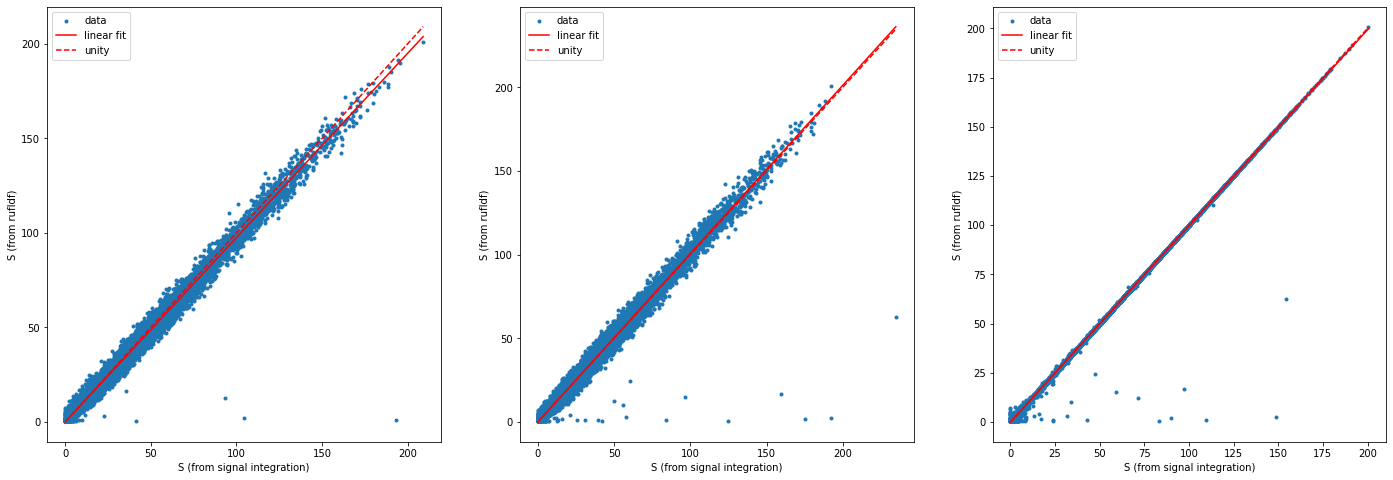

In [20]:
from sklearn.linear_model import LinearRegression

fig, axes = plt.subplots(figsize=(24, 8), ncols=3)

y_reg = X["S"].to_numpy()



for ax, param_name, data_override in zip(
    axes,
    ["top_S_all", "bot_S_all", "S_average"],
    [None, None, 0.5 * (y["top_S_all"].to_numpy() + y["bot_S_all"].to_numpy())]
):
    x_reg = data_override if data_override is not None else y[param_name].to_numpy()
    ax.scatter(x_reg, y_reg, marker=".", label="data")

    regression = LinearRegression(fit_intercept=False)
    regression.fit(x_reg.reshape(-1, 1), y_reg)
    slope = regression.coef_[0]
    print(f"{param_name} regression R^2 = {regression.score(x_reg.reshape(-1, 1), y_reg):.3f}, slope = {slope:.3f}")
    
    x_line_plot = np.array([x_reg.min(), x_reg.max()])
    ax.plot(x_line_plot, regression.predict(x_line_plot.reshape(-1, 1)), color="red", label="linear fit")
    ax.plot(x_line_plot, x_line_plot, color="red", label="unity", linestyle="--")

    ax.legend()
    ax.set_ylabel("S (from rufldf)")
    ax.set_xlabel("S (from signal integration)")
plt.show()